# Exercise 14

## Predict rating using LSTM


Presentado por:

Diego Alejandro Diaz - 202027745 Andres Felipe Botero - 201421261 Sindy Carolina Niño - 202020034 Juliana López Botero - 202027785

In [25]:
import pandas as pd
import pandas as pd
import nltk
nltk.download('stopwords')
import re
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers.recurrent import LSTM
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/esteban/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataTraining = pd.read_csv('https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [3]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [4]:
plots

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [5]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

# Exercise 14.1

- Remove stopwords 
- Lowercase
- split the text in words 
- pad_sequences

Se remueven las stopwords y la puntuacion no se deaseada para realizar la limpieza de los datos

In [6]:
def remove_stop_words(text):
    nltk_stop_words = nltk.corpus.stopwords.words("english")
    text_words = text.split()
    result_words  = [word for word in text_words if word.lower() not in nltk_stop_words]
    result = ' '.join(result_words)
    return result

In [7]:
def preprocess_text(sen):
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = remove_stop_words(sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

Nos aseguramos que todo el texto este en minusculas y separamos por palabra

In [8]:
X = []
sentences = list(plots.str.lower())
for sen in sentences:
    X.append(preprocess_text(sen))

In [38]:
X[1]

'serial killer decides teach secrets satisfying career video store clerk'

In [28]:

vect = CountVectorizer(ngram_range = (1,1))
X_dtm = vect.fit_transform(plots)
X_dtm

<7895x38672 sparse matrix of type '<class 'numpy.int64'>'
	with 634551 stored elements in Compressed Sparse Row format>

In [34]:
vect.get_feature_names()

['aa',
 'aaa',
 'aames',
 'aang',
 'aaron',
 'aaronow',
 'aarons',
 'aback',
 'abagnale',
 'abalam',
 'abalone',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abandons',
 'abatement',
 'abba',
 'abbe',
 'abberline',
 'abbey',
 'abbie',
 'abbott',
 'abbotts',
 'abby',
 'abc',
 'abdellatif',
 'abdicate',
 'abdomen',
 'abduct',
 'abducted',
 'abductee',
 'abducting',
 'abduction',
 'abductor',
 'abductors',
 'abducts',
 'abdullah',
 'abe',
 'abel',
 'abercrombie',
 'aberline',
 'abernathy',
 'aberrant',
 'aberration',
 'abetting',
 'abhor',
 'abhorrent',
 'abhorring',
 'abhors',
 'abide',
 'abides',
 'abigail',
 'abilene',
 'abilities',
 'ability',
 'abin',
 'abital',
 'abkani',
 'able',
 'ablixa',
 'abm',
 'abn',
 'abner',
 'abney',
 'abnormal',
 'abnormality',
 'aboard',
 'abode',
 'abolish',
 'abolishing',
 'abolition',
 'abolitionist',
 'abominable',
 'abomination',
 'aborigines',
 'abort',
 'aborting',
 'abortion',
 'abortions',
 'abortive',
 'aborts',
 'abound',
 'about

Dividimos los datos en train y test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Toquenizamos los datos para sacar la matriz final que ingresa al modelo

In [11]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

pad_sequences

In [12]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [13]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/home/esteban/Documentos/proyecto2/glove/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [14]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

Matriz Final para ingresar al modelo

In [15]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.22556999,  0.49417999,  0.48609999, ..., -0.45743999,
         0.49645999,  0.34906   ],
       [ 0.25156999,  0.4589    ,  0.30274001, ..., -0.74779999,
         0.13684   ,  0.18927   ],
       ...,
       [ 0.015644  ,  0.39662999,  0.2493    , ...,  0.37428999,
        -0.17079   , -0.26449999],
       [ 0.45837   ,  0.078641  ,  0.37006   , ...,  0.54671001,
         0.0096111 , -0.71417999],
       [-0.024795  , -0.23905   ,  0.31057   , ..., -0.48078001,
        -0.35453999, -0.10341   ]])

# Exercise 14.2

Create a LSTM neural network to predict the rating of a movie

Calculate the testing set accuracy

In [16]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          3463700   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 3,581,077
Trainable params: 117,377
Non-trainable params: 3,463,700
_________________________________________________________________
None


In [18]:
import livelossplot
from livelossplot import PlotLossesKeras
%matplotlib inline

In [19]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/10
40/40 [==============================] - 18s 119ms/step - loss: 0.6907 - acc: 0.5032 - val_loss: 0.6848 - val_acc: 0.5277
Epoch 2/10
40/40 [==============================] - 4s 103ms/step - loss: 0.6837 - acc: 0.5465 - val_loss: 0.6565 - val_acc: 0.6068
Epoch 3/10
40/40 [==============================] - 4s 103ms/step - loss: 0.6631 - acc: 0.6002 - val_loss: 0.6580 - val_acc: 0.5981
Epoch 4/10
40/40 [==============================] - 4s 103ms/step - loss: 0.6645 - acc: 0.6119 - val_loss: 0.6548 - val_acc: 0.6195
Epoch 5/10
40/40 [==============================] - 4s 103ms/step - loss: 0.6464 - acc: 0.6344 - val_loss: 0.6669 - val_acc: 0.5823
Epoch 6/10
40/40 [==============================] - 4s 103ms/step - loss: 0.6501 - acc: 0.6267 - val_loss: 0.6538 - val_acc: 0.6171
Epoch 7/10
40/40 [==============================] - 4s 102ms/step - loss: 0.6337 - acc: 0.6564 - val_loss: 0.6565 - val_acc: 0.6242
Epoch 8/10
40/40 [==============================] - 4s 105ms/step - loss: 0

In [20]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6704739332199097
Test Accuracy: 0.6067131161689758


Accuracy 0,606

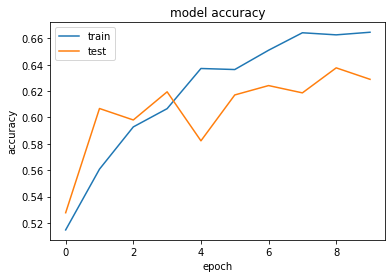

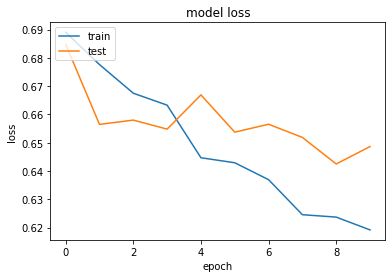

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
